In [1]:

import sys
import pandas as pd 
import tensorflow as tf 
# featuretools for automated feature engineering
import featuretools as ft
import featuretools.variable_types as vtypes

In [2]:
df_train = pd.read_csv('D:/projects/ai/poc/homework/training_data_20210128.csv')
#df_train = pd.read_csv('./training_data_20210128.csv')

In [3]:
df_train.head()

# df_train = df_train.drop(columns=['IDX','LOT_TYPE','WS_DATE','ACTUAL_WP_OUT','DATA_DATE','OP_NO','LOT_ID'])
df_train = df_train.drop(df_train.loc[:, '0E':'ZL'].columns, axis = 1) 

In [4]:
es = ft.EntitySet(id = 'WIP')

In [5]:
# Entity set with id applications
es = ft.EntitySet(id = 'WIP')

# Create an entity from the client dataframe
# This dataframe already has an index and a time index
es = es.entity_from_dataframe(entity_id = 'WIP',
             dataframe = df_train,  
             variable_types={'IDX': ft.variable_types.Categorical},
             make_index = True, 
             index = 'ID', time_index = 'DATA_DATE')

In [20]:
es

Entityset: WIP
  Entities:
    WIP [Rows: 226723, Columns: 16]
  Relationships:
    No relationships

In [7]:
# List the primitives in a dataframe
# primitives = ft.list_primitives()
# pd.options.display.max_colwidth = 100

# primitives[primitives['type'] == 'aggregation'].head(10)
primitives = ft.list_primitives()
#pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(22)

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
0,num_unique,aggregation,True,True,"Determines the number of distinct values, igno...",Discrete,Numeric
1,num_true,aggregation,True,False,Counts the number of `True` values.,Boolean,Numeric
2,sum,aggregation,True,True,"Calculates the total addition, ignoring `NaN`.",Numeric,Numeric
3,entropy,aggregation,False,False,Calculates the entropy for a categorical variable,Categorical,Numeric
4,max,aggregation,True,True,"Calculates the highest value, ignoring `NaN` v...",Numeric,Numeric
5,all,aggregation,True,False,Calculates if all values are 'True' in a list.,Boolean,Boolean
6,min,aggregation,True,True,"Calculates the smallest value, ignoring `NaN` ...",Numeric,Numeric
7,first,aggregation,False,False,Determines the first value in a list.,Variable,None
8,count,aggregation,True,True,"Determines the total number of values, excludi...",Index,Numeric
9,n_most_common,aggregation,False,False,Determines the `n` most common elements.,Discrete,Discrete


In [19]:
primitives[primitives['type'] == 'transform'].head(78)

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
22,is_weekend,transform,True,True,Determines if a date falls on a weekend.,Datetime,Boolean
23,cum_max,transform,False,False,Calculates the cumulative maximum.,Numeric,Numeric
24,less_than_equal_to_scalar,transform,True,True,Determines if values are less than or equal to...,"Datetime, Numeric, Ordinal",Boolean
25,not,transform,True,True,Negates a boolean value.,Boolean,Boolean
26,day,transform,True,True,Determines the day of the month from a datetime.,Datetime,Ordinal
27,divide_numeric_scalar,transform,True,True,Divide each element in the list by a scalar.,Numeric,Numeric
28,add_numeric_scalar,transform,True,True,Add a scalar to each value in the list.,Numeric,Numeric
29,less_than,transform,True,True,Determines if values in one list are less than...,"Datetime, Numeric, Ordinal",Boolean
30,longitude,transform,False,False,Returns the second tuple value in a list of La...,LatLong,Numeric
31,week,transform,True,True,Determines the week of the year from a datetime.,Datetime,Ordinal


In [9]:
# Default primitives from featuretools
#default_agg_primitives =  ["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"]
# default_trans_primitives =  ["day", "year", "month", "weekday", "haversine",   "characters"]
default_trans_primitives =  ["day", "year", "month", "weekday"]

In [10]:
# DFS with specified primitives
feature_names = ft.dfs(entityset = es, target_entity = 'WIP',
                       trans_primitives = default_trans_primitives,
                       #agg_primitives=default_agg_primitives, 
                        verbose = 1,
                       features_only = True)
feature_matrix,feature_names = ft.dfs(entityset = es, target_entity = 'WIP',
                       trans_primitives = default_trans_primitives,
                       #agg_primitives=default_agg_primitives, 
                        verbose = 1,
                       features_only = False)

 

Built 24 features
Built 24 features
Elapsed: 00:01 | Progress: 100%|██████████


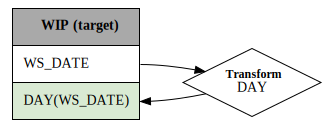

In [25]:
# Feature lineage graphs
# Understanding Feature Output¶
# In general, Featuretools references generated features through the feature name. In order to make features easier to understand, Featuretools offers two additional tools, featuretools.graph_feature() and featuretools.describe_feature(), to help explain what a feature is and the steps Featuretools took to generate it.
feature = feature_names[14]
ft.graph_feature(feature)

In [26]:
ft.describe_feature(feature)

'The day of the month of the "WS_DATE".'

In [11]:
feature_matrix,feature_names =ft.dfs(entityset = es, target_entity = 'WIP',
                       trans_primitives=['weekday', 'day'],
                       #agg_primitives=default_agg_primitives, 
                        verbose = 1,
                       features_only = False)


 

Built 18 features
Elapsed: 00:01 | Progress: 100%|██████████


In [12]:
#累績總計 與總數
 
feature_matrix, features_list = ft.dfs(entityset=es, 
    verbose = 1,
	target_entity='WIP',
    agg_primitives=[], 
	trans_primitives=['cum_sum', 'cum_count'], 
	groupby_trans_primitives=['cum_sum', 'cum_count'], #累積總計、累積總數
    
    ignore_variables={'WIP': ['PRIORITY']}
    
	)
feature_matrix    


Built 15 features
Elapsed: 00:00 | Progress:   0%|          C:\ProgramData\Anaconda3\envs\PY379\lib\site-packages\featuretools\synthesis\dfs.py:317: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['cum_count']
  groupby_trans_primitives: ['cum_count', 'cum_sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)
Elapsed: 00:01 | Progress: 100%|██████████


,LOT_ID,STATUS,CHIPNAME,LAYER,REMAIN_LAYER_SEQ,OP_NO,REMAIN_OP_SEQ,LOT_TYPE,WIP_QTY,IS_MAIN_ROUTE,IDX,CUM_SUM(IS_MAIN_ROUTE),CUM_SUM(REMAIN_LAYER_SEQ),CUM_SUM(REMAIN_OP_SEQ),CUM_SUM(WIP_QTY)
ID,,,,,,,,,,,,,,,
0,AWM885000,WAITING,CHIP25,1C,9.0,1C.WWW20,222.0,FDY,25,1,32905,1,9.0,222.0,25
1,AWM009000,WAITING,CHIP25,1M,8.0,1M.ECM10,199.0,FDY,25,1,32939,2,17.0,421.0,50
2,AWM125000,WAITING,CHIP25,2T,5.0,2T.PPK10,101.0,FDY,25,1,33153,3,22.0,522.0,75
3,AWN854000,PROCESSING,CHIP25,1P,14.0,1P.WWA10,319.0,FDY,25,1,47309,4,36.0,841.0,100
4,AWN860000,WAITING,CHIP25,2N,13.0,2N.IIA10,292.0,FDY,25,1,47315,5,49.0,1133.0,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226646,MPF498000,PROCESSING,CHIP177,1G,19.0,1G.FRA05,450.0,FDY,25,1,510556,220565,3063249.0,65282678.0,5133370
226647,MPG078000,PROCESSING,CHIP177,1F,22.0,1F.FFE10,523.0,FDY,18,1,511000,220566,3063271.0,65283201.0,5133388
226648,MPG078000,PROCESSING,CHIP177,1F,22.0,1F.FFE10,523.0,FDY,7,1,511001,220567,3063293.0,65283724.0,5133395


In [13]:
ft.primitives.list_primitives()

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
0,num_unique,aggregation,True,True,"Determines the number of distinct values, igno...",Discrete,Numeric
1,num_true,aggregation,True,False,Counts the number of `True` values.,Boolean,Numeric
2,sum,aggregation,True,True,"Calculates the total addition, ignoring `NaN`.",Numeric,Numeric
3,entropy,aggregation,False,False,Calculates the entropy for a categorical variable,Categorical,Numeric
4,max,aggregation,True,True,"Calculates the highest value, ignoring `NaN` v...",Numeric,Numeric
...,...,...,...,...,...,...,...
74,modulo_numeric,transform,True,True,Element-wise modulo of two lists.,Numeric,Numeric
75,num_characters,transform,True,True,Calculates the number of characters in a string.,NaturalLanguage,Numeric
76,less_than_equal_to,transform,True,True,Determines if values in one list are less than...,"Datetime, Numeric, Ordinal",Boolean
77,age,transform,True,False,Calculates the age in years as a floating poin...,DateOfBirth,Numeric


In [14]:
from featuretools.primitives import CumCount
from featuretools.primitives import IsWeekend
#累績總數
cum_count = CumCount()
cum_count([1, 2, 3, 4, None, 5]).tolist()
isWkend = IsWeekend()
feature_matrix, features_list = ft.dfs(entityset=es, 
    verbose = 1,
	target_entity='WIP',
    agg_primitives=[], 
	trans_primitives=['cum_sum','cum_count','is_weekend'], 
	primitive_options={
        'cum_sum': {
                'include_variables':
                    {'WIP': ['WIP_QTY']},
                'ignore_variables':
                    {'WIP': ['IS_MAIN_ROUTE']}    
                    
                    },
		'cum_count': {
                'include_variables':
                    {'WIP': ['WIP_QTY']},
                'ignore_variables':
                    {'WIP': ['IS_MAIN_ROUTE']}    
                    
                    },
        'is_weekend': {
                'ignore_variables':
                        {'WIP': ['ACTUAL_WP_OUT']}}
        }
    
	)



feature_matrix    

Built 15 features
Elapsed: 00:00 | Progress:   0%|          C:\ProgramData\Anaconda3\envs\PY379\lib\site-packages\featuretools\synthesis\dfs.py:317: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['cum_count']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)
Elapsed: 00:01 | Progress: 100%|██████████


,LOT_ID,STATUS,CHIPNAME,LAYER,REMAIN_LAYER_SEQ,OP_NO,REMAIN_OP_SEQ,PRIORITY,LOT_TYPE,WIP_QTY,IS_MAIN_ROUTE,IDX,CUM_SUM(WIP_QTY),IS_WEEKEND(DATA_DATE),IS_WEEKEND(WS_DATE)
ID,,,,,,,,,,,,,,,
0,AWM885000,WAITING,CHIP25,1C,9.0,1C.WWW20,222.0,4,FDY,25,1,32905,25,True,True
1,AWM009000,WAITING,CHIP25,1M,8.0,1M.ECM10,199.0,4,FDY,25,1,32939,50,True,True
2,AWM125000,WAITING,CHIP25,2T,5.0,2T.PPK10,101.0,4,FDY,25,1,33153,75,True,False
3,AWN854000,PROCESSING,CHIP25,1P,14.0,1P.WWA10,319.0,4,FDY,25,1,47309,100,True,False
4,AWN860000,WAITING,CHIP25,2N,13.0,2N.IIA10,292.0,4,FDY,25,1,47315,125,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226646,MPF498000,PROCESSING,CHIP177,1G,19.0,1G.FRA05,450.0,1,FDY,25,1,510556,5133370,False,False
226647,MPG078000,PROCESSING,CHIP177,1F,22.0,1F.FFE10,523.0,1,FDY,18,1,511000,5133388,False,False
226648,MPG078000,PROCESSING,CHIP177,1F,22.0,1F.FFE10,523.0,1,FDY,7,1,511001,5133395,False,False


# Feature Selection

In [40]:
#select features that have at least 2 unique values and that are not all null
#(feature_matrix, features=None):
from featuretools.selection import remove_low_information_features  ## 移除较小信息的特征

#Removes columns from a feature matrix that have higher than a set threshold of null values.
#(feature_matrix, features=None, pct_null_threshold=0.95):
from featuretools.selection import remove_highly_null_features

#Removes columns in feature matrix where all the values are the same.
#(feature_matrix, features=None, count_nan_as_value=False):
from featuretools.selection import remove_single_value_features

#Removes columns in feature matrix that are highly correlated with another column.
#(feature_matrix, features=None, pct_corr_threshold=0.95,features_to_check=None, features_to_keep=None):
from featuretools.selection import remove_highly_correlated_features 

print('features',feature_matrix.shape)
features1, feature_names1 = remove_low_information_features(feature_matrix, features_list)
print('被刪除的欄位 remove_low_information_features',feature_matrix.shape)
print('Removed %d features from training features' % (feature_matrix.shape[1] - features1.shape[1])) 
print(set(feature_matrix) - set(features1))

features1, feature_names1 = remove_highly_null_features(feature_matrix, features_list,0.95)
print('被刪除的欄位 remove_highly_null_features',features1.shape)
print('Removed %d features from training features' % (feature_matrix.shape[1] - features1.shape[1])) 
print(set(feature_matrix) - set(features1))

features1, feature_names1 = remove_single_value_features(feature_matrix, features_list)
print('被刪除的欄位 remove_single_value_features',features1.shape)
print('Removed %d features from training features' % (feature_matrix.shape[1] - features1.shape[1])) 
print(set(feature_matrix) - set(features1))

features1, feature_names1 = remove_highly_correlated_features(feature_matrix, features_list,0.95)
print('被刪除的欄位 remove_highly_correlated_features',features1.shape)
print('Removed %d features from training features' % (feature_matrix.shape[1] - features1.shape[1])) 
print(set(feature_matrix) - set(features1))

features (226723, 17)
被刪除的欄位 remove_low_information_features (226723, 17)
Removed 0 features from training features
set()
被刪除的欄位 remove_highly_null_features (226723, 17)
Removed 0 features from training features
set()
被刪除的欄位 remove_single_value_features (226723, 17)
Removed 0 features from training features
set()
被刪除的欄位 remove_highly_correlated_features (226723, 12)
Removed 5 features from training features
{'ABSOLUTE(REMAIN_LAYER_SEQ)', 'ABSOLUTE(WIP_QTY)', 'ABSOLUTE(REMAIN_OP_SEQ)', 'ABSOLUTE(IS_MAIN_ROUTE)', 'ABSOLUTE(PRIORITY)'}


In [39]:
# print(set(feature_matrix))
# print(feature_matrix.shape)
# print(set(feature_names1))
# 被刪除的欄位
print(set(feature_matrix) - set(features1))

{'ABSOLUTE(REMAIN_LAYER_SEQ)', 'ABSOLUTE(WIP_QTY)', 'ABSOLUTE(REMAIN_OP_SEQ)', 'ABSOLUTE(IS_MAIN_ROUTE)', 'ABSOLUTE(PRIORITY)'}


# encode_features

In [16]:
#featuretools.synthesis :encode_features
fm_enc,f_enc =ft.encode_features(features1, feature_names1)
fm_enc.head()

,LOT_ID = BSP340000,LOT_ID = BSP972000,LOT_ID = BSP968000,LOT_ID = BSP949000,LOT_ID = BSP946000,LOT_ID = BSP945000,LOT_ID = BSP944000,LOT_ID = BSP943000,LOT_ID = BSP922000,LOT_ID = BSP921000,...,IDX = 507661,IDX = 507599,IDX = 507597,IDX = 507596,IDX = 507054,IDX = 507053,IDX = 507052,IDX is unknown,IS_WEEKEND(DATA_DATE),IS_WEEKEND(WS_DATE)
ID,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [27]:
from featuretools.primitives import make_agg_primitive, make_trans_primitive
from featuretools.variable_types import Text, Numeric
def absolute(column):
    return abs(column)


Absolute = make_trans_primitive(function=absolute, input_types=[Numeric], return_type=Numeric)

def maximum(column):
    return max(column)
Maximum = make_agg_primitive(function=maximum,
    input_types=[Numeric],
    return_type=Numeric)


# Maximum = make_agg_primitive(function=maximum, input_types=[Numeric], return_type=Numeric)

In [29]:

feature_matrix,feature_defs = ft.dfs(entityset=es,
                target_entity="WIP",
                agg_primitives=[Maximum],
                trans_primitives=[Absolute],
                max_depth=2)


C:\ProgramData\Anaconda3\envs\PY379\lib\site-packages\featuretools\synthesis\dfs.py:317: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['maximum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)
